In [1]:
# Essential Libraries
import os
import sys
import numpy as np
import pandas as pd
import datetime
import random

# ML
from sklearn import datasets
import tensorflow as tf
import keras

# Plots
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
sns.set_style("whitegrid");
sns.set_color_codes(palette='pastel');

# Stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

# Display options
pd.set_option('display.max_columns', None);
pd.options.display.max_seq_items = 8000;
pd.options.display.max_rows = 8000;
%precision 6

# Ignore Warnings
import warnings
warnings.filterwarnings(action="ignore")

In [2]:
# Define data and image directory
PROJECT_ROOT_DIR = "."
DATA_DIR = os.path.join(PROJECT_ROOT_DIR, "data")
IMAGE_DIR = os.path.join(PROJECT_ROOT_DIR, "img")

from IPython.display import Image
for d in [DATA_DIR, IMAGE_DIR]:
    if not os.path.exists(d):
        os.mkdir(d)

# Define a function to save images
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGE_DIR, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
from pprint import pprint

# This is a little recursive helper function converts all nested ndarrays to python list of lists so that pretty printer knows what to do.

def arrayToList(arr):
    if type(arr) == type(np.array):
        #If the passed type is an ndarray then convert it to a list and
        #recursively convert all nested types
        return arrayToList(arr.tolist())
    else:
        #if item isn't an ndarray leave it as is.
        return arr
    
# Suppress exponential notation, define an appropriate float formatter
# Specify stdout line width and let pretty print do the work
np.set_printoptions(suppress=True, formatter={'float_kind':'{:12.6f}'.format}, linewidth=120)

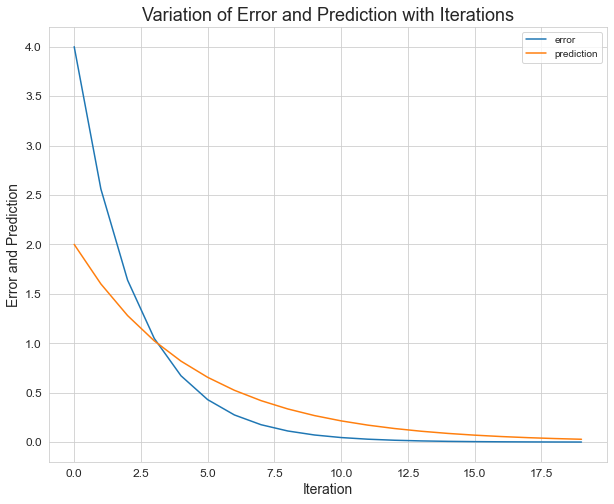

In [3]:
# weights = np.array([0.5,0.48,-0.7])
weights = np.array([1, 1, 1])
alpha = 0.1

streetlights = np.array( [ [ 1, 0, 1 ],
                           [ 0, 1, 1 ],
                           [ 0, 0, 1 ],
                           [ 1, 1, 1 ],
                           [ 0, 1, 1 ],
                           [ 1, 0, 1 ] ] )

walk_vs_stop = np.array( [ 0, 1, 0, 1, 1, 0 ] )

x = streetlights[0] # [1,0,1]
goal_prediction = walk_vs_stop[0] # equals 0... i.e. "stop"

error_lst, prediction_lst = [], []

for iteration in range(20):
    prediction = weights.dot(x)
    error = (goal_prediction - prediction) ** 2
    delta = prediction - goal_prediction
    weights = weights - (alpha * (x * delta))
    error_lst.append(error)
    prediction_lst.append(prediction)

#     print("Error:" + str(error) + " Prediction:" + str(prediction))

err_df = pd.DataFrame(list(zip(error_lst, prediction_lst)), columns=['error', 'prediction'])
ax = err_df.plot(figsize=(10, 8), title = 'Variation of Error and Prediction with Iterations');
ax.title.set_size(18)
ax.set_xlabel("Iteration")
ax.set_ylabel("Error and Prediction")
plt.show()

### Learning the whole dataset (multiple input $\rightarrow$ multiple output):

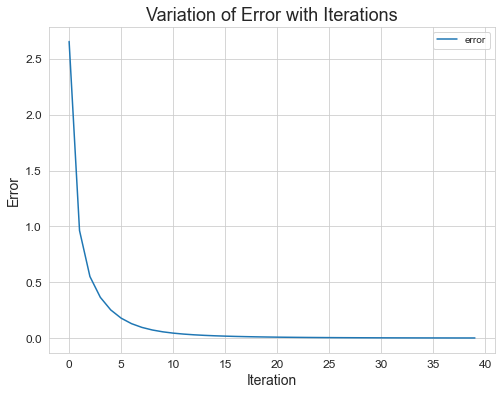

In [4]:
import numpy as np

weights = np.array([0.5,0.48,-0.7])
alpha = 0.1

streetlights = np.array( [[ 1, 0, 1 ],
                          [ 0, 1, 1 ],
                          [ 0, 0, 1 ],
                          [ 1, 1, 1 ],
                          [ 0, 1, 1 ],
                          [ 1, 0, 1 ] ] )

walk_vs_stop = np.array( [ 0, 1, 0, 1, 1, 0 ] )

input = streetlights[0] # [1,0,1]
goal_prediction = walk_vs_stop[0] # equals 0... i.e. "stop"

err_lst = []    

for iteration in range(40):
    error_for_all_lights = 0
    for row_index in range(len(walk_vs_stop)):
        input = streetlights[row_index]
        goal_prediction = walk_vs_stop[row_index]
        
        prediction = input.dot(weights)
        
        error = (goal_prediction - prediction) ** 2
        error_for_all_lights += error
        
        delta = prediction - goal_prediction
        weights = weights - (alpha * (input * delta))	
#         print("Prediction:" + str(prediction))
    err_lst.append(error_for_all_lights)
#     print("Error:" + str(error_for_all_lights) + "\n")
    
err_df = pd.DataFrame(err_lst,  columns=['error'])
ax = err_df.plot(figsize=(8, 6), title = 'Variation of Error with Iterations')
ax.title.set_size(18)
ax.set_xlabel("Iteration")
ax.set_ylabel("Error")
plt.show()

## My first Deep Neural Network

In [5]:
import numpy as np

np.random.seed(1)

def relu(x):
    return (x > 0) * x 

alpha = 0.2
hidden_size = 4

streetlights = np.array( [[ 1, 0, 1 ],
                          [ 0, 1, 1 ],
                          [ 0, 0, 1 ],
                          [ 1, 1, 1 ] ] )

walk_vs_stop = np.array([[ 1, 1, 0, 0]]).T

weights_0_1 = 2*np.random.random((3,hidden_size)) - 1
weights_1_2 = 2*np.random.random((hidden_size,1)) - 1

layer_0 = streetlights[0]
layer_1 = relu(np.dot(layer_0,weights_0_1))
layer_2 = np.dot(layer_1,weights_1_2)

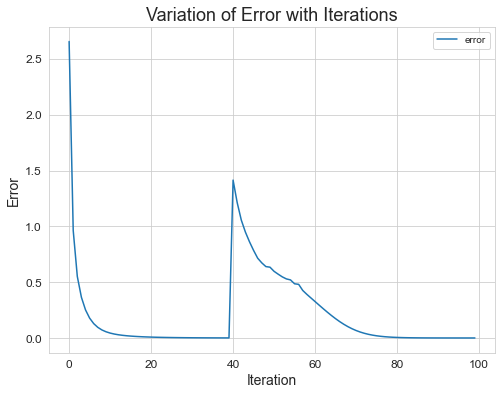

In [6]:
import numpy as np

np.random.seed(1)

def relu(x):
    return (x > 0) * x # returns x if x > 0
                       # return 0 otherwise

def relu2deriv(output):
    return output>0 # returns 1 for input > 0
                    # return 0 otherwise
alpha = 0.2
hidden_size = 4

weights_0_1 = 2*np.random.random((3,hidden_size)) - 1
weights_1_2 = 2*np.random.random((hidden_size,1)) - 1

# lst_alpha = [0.01, 0.05, 0.1, 0.2]  

for iteration in range(60):
    layer_2_error = 0
    for i in range(len(streetlights)):
        layer_0 = streetlights[i:i+1]
        layer_1 = relu(np.dot(layer_0,weights_0_1))
        layer_2 = np.dot(layer_1,weights_1_2)

        layer_2_error += np.sum((layer_2 - walk_vs_stop[i:i+1]) ** 2)

        layer_2_delta = (walk_vs_stop[i:i+1] - layer_2)
        layer_1_delta=layer_2_delta.dot(weights_1_2.T)*relu2deriv(layer_1)

        weights_1_2 += alpha * layer_1.T.dot(layer_2_delta)
        weights_0_1 += alpha * layer_0.T.dot(layer_1_delta)

#     if(iteration % 10 == 9):
#         print("Error:" + str(layer_2_error))
    err_lst.append(layer_2_error)
    
err_df = pd.DataFrame(err_lst,  columns=['error'])
ax = err_df.plot(figsize=(8, 6), title = 'Variation of Error with Iterations')
ax.title.set_size(18)
ax.set_xlabel("Iteration")
ax.set_ylabel("Error")
plt.show()

In [7]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

images, labels = (x_train[0:1000].reshape(1000,28*28) / 255, y_train[0:1000])

one_hot_labels = np.zeros((len(labels),10)) # Initialize 0 matrix of dim. 1000x10
for i,l in enumerate(labels):               # If the label is 5 for 3rd index, the value of (3, 5) elem.of the  
    one_hot_labels[i][l] = 1                # one-hot matrix is 1
labels = one_hot_labels

test_images = x_test.reshape(len(x_test),28*28) / 255
test_labels = np.zeros((len(y_test),10))
for i,l in enumerate(y_test):
    test_labels[i][l] = 1
    
np.random.seed(1)
relu = lambda x:(x>=0) * x # returns x if x > 0, return 0 otherwise
relu2deriv = lambda x: x>=0 # returns 1 for input > 0, return 0 otherwise
alpha, iterations, hidden_size, pixels_per_image, num_labels = (0.005, 350, 40, 784, 10)

weights_0_1 = 0.2*np.random.random((pixels_per_image,hidden_size)) - 0.1
weights_1_2 = 0.2*np.random.random((hidden_size,num_labels)) - 0.1



for j in range(iterations):
    error, correct_cnt = (0.0, 0)
    
    for i in range(len(images)):
        layer_0 = images[i:i+1]
        layer_1 = relu(np.dot(layer_0,weights_0_1))
        layer_2 = np.dot(layer_1,weights_1_2)

        error += np.sum((labels[i:i+1] - layer_2) ** 2)
        correct_cnt += int(np.argmax(layer_2) == \
                                        np.argmax(labels[i:i+1]))
        

        layer_2_delta = (labels[i:i+1] - layer_2)
        layer_1_delta = layer_2_delta.dot(weights_1_2.T)\
                                    * relu2deriv(layer_1)
        weights_1_2 += alpha * layer_1.T.dot(layer_2_delta)
        weights_0_1 += alpha * layer_0.T.dot(layer_1_delta)

    sys.stdout.write("\r I:"+str(j)+ \
                     " Train-Err:" + str(error/float(len(images)))[0:5] +\
                     " Train-Acc:" + str(correct_cnt/float(len(images))))

 I:349 Train-Err:0.108 Train-Acc:1.099

In [8]:
if(j % 10 == 0 or j == iterations-1):
    error, correct_cnt = (0.0, 0)

    for i in range(len(test_images)):

        layer_0 = test_images[i:i+1]
        layer_1 = relu(np.dot(layer_0,weights_0_1))
        layer_2 = np.dot(layer_1,weights_1_2)

        error += np.sum((test_labels[i:i+1] - layer_2) ** 2)
        correct_cnt += int(np.argmax(layer_2) == \
                                        np.argmax(test_labels[i:i+1]))
    sys.stdout.write(" Test-Err:" + str(error/float(len(test_images)))[0:5] +\
                     " Test-Acc:" + str(correct_cnt/float(len(test_images))) + "\n")
    print()

 Test-Err:0.653 Test-Acc:0.7073

